In [1]:
import graphviz
import mglearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)


In [4]:
##默认使用1层100个隐藏单元
##二分类：使用simoid激活输出，使用误差平方和函数
##隐藏激活默认使用reLu
mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)

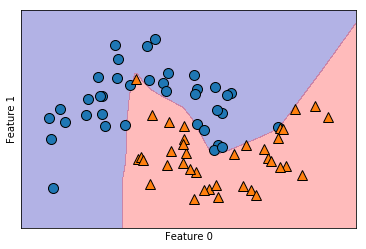

In [5]:
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

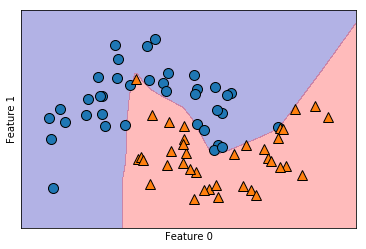

In [10]:
##使用2个隐藏层，每层10个隐藏单元
##隐藏激活使用双曲正切tanh
##正则化参数使用alpha=0.2
mlp2=MLPClassifier(solver='lbfgs',random_state=0,activation='tanh',hidden_layer_sizes=[10,10],alpha=0.2).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer=load_breast_cancer()

In [14]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
cancer.data.shape

(569, 30)

In [16]:
np.unique(cancer.target)

array([0, 1])

In [17]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
X1,X2,y1,y2=train_test_split(cancer.data,cancer.target,random_state=2)
mlp=MLPClassifier(random_state=40).fit(X1,y1)
print('accuracy on training set:{:.2f}'.format(mlp.score(X1,y1)))
print('accuracy on test set:{:.2f}'.format(mlp.score(X2,y2)))

accuracy on training set:0.90
accuracy on test set:0.90


In [26]:
##神经网络对数据的缩放比较敏感，因此对它进行标准化
X1_mean=X1.mean(axis=0)
X1_v=X1.std(axis=0)

X1_scaled=(X1-X1_mean)/X1_v

X2_mean=X2.mean(axis=0)
X2_v=X2.std(axis=0)
X2_scaled=(X2-X1_mean)/X1_v

In [40]:
mlp2=MLPClassifier(max_iter=1000,random_state=0).fit(X1_scaled,y1)
print('accuracy on training set:{:.2f}'.format(mlp2.score(X1_scaled,y1)))
print('accuracy on test set:{:.2f}'.format(mlp2.score(X2_scaled,y2)))


accuracy on training set:1.00
accuracy on test set:0.95


__可以看到，数据经过标准化整理后，训练和测试的准确率都有了相当的提高__

In [37]:
X1_scaled.mean(axis=0).round(3)

array([-0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0.])

In [38]:
X1_scaled.std(axis=0).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
np.sqrt(4096)

64.0

In [42]:
4096/14

292.57142857142856